# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# BRIEF ANALYSIS - BASED ON THE WORK BELOW - BY RYAN MACFARLANE - 20240123

# I feel strongly that Capomulin and Ramicane are shown to be the most effective treatment regimens for mice with these tumors.  Not only do they show considerably smaller tumor sizes over
# the length of the treatment regimen, but they also show more timepoints than their counterparts, and less variance.  The increase in timepoints is particularly profound for me - it means 
# that not only is the data they provide more trustworthy (due to more samples), but it could also possibly mean that they kept their mice alive for longer.  
# In summary - Capomulin and Ramicane are by far the most promising treatment regimens of those tested.  Thank you!

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview

merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
merged_df.shape

(1893, 8)

In [3]:
# Checking the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merged_df.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate_rows= merged_df[duplicates]

if duplicate_rows.empty:
    print("No duplicates were found")
else:
    print("Duplicate entries found:")
    print(duplicate_rows["Mouse ID"])

Duplicate entries found:
861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_filter_series = merged_df["Mouse ID"].isin(duplicate_rows["Mouse ID"])

duplicate_data = merged_df.loc[duplicate_mice_filter_series]
                               
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
clean_df = merged_df.loc[~duplicate_mice_filter_series]

print(clean_df.shape)

clean_df.head()


(1880, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
total_clean_mice = clean_df["Mouse ID"].nunique()
total_clean_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_drug = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(numeric_only = True)
median_drug = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(numeric_only = True)
var_drug = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(numeric_only = True)
std_drug = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(numeric_only = True)
sem_drug = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(numeric_only = True)

# Assemble the resulting series into a single summary DataFrame.
clean_summary_dict = {"Mean": mean_drug ,"Median": median_drug, "Var": var_drug, "Std": std_drug, "Sem": sem_drug}

clean_summary_df = pd.DataFrame(clean_summary_dict)

clean_summary_df

,Mean,Median,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

full_summary_df = clean_df.groupby("Drug Regimen").agg({
                        'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

#Rename columns
full_summary_df.columns = ['Drug Regimen', 'Mean Tumor Volume', 'Tumor Volume median', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

full_summary_df


,Drug Regimen,Mean Tumor Volume,Tumor Volume median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

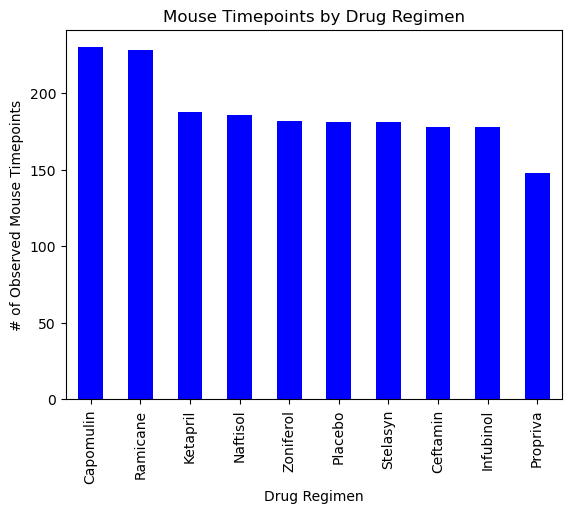

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# group by regimen - and count timepoint to get x and y axis values
regimen_count_series = clean_df.groupby('Drug Regimen').count()["Timepoint"].sort_values(ascending=False) 

# Create bar graph
regimen_count_series.plot(kind='bar', color = 'blue')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Timepoints by Drug Regimen")

# x-labels at 90deg
plt.xticks(rotation=90)

# Show plot
plt.show()

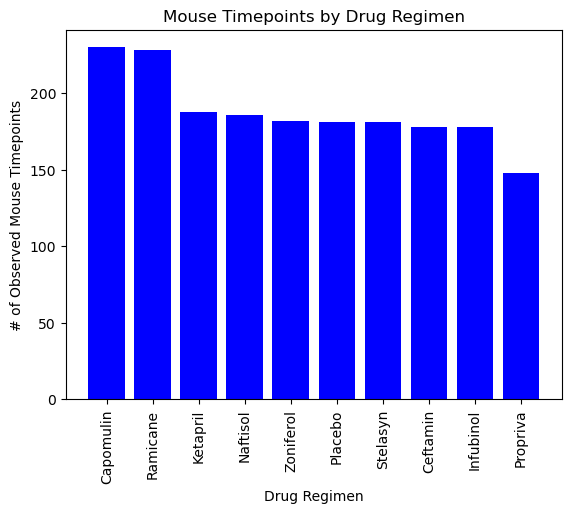

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# group by regimen - and count timepoint to get x and y axis values
regimen_count_series = clean_df.groupby('Drug Regimen').count()["Timepoint"].sort_values(ascending=False) 

# Create bar graph
plt.bar(regimen_count_series.index, regimen_count_series.values, color = "blue")

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Timepoints by Drug Regimen")

# x-labels at 90deg
plt.xticks(rotation=90)

# Show plot
plt.show()

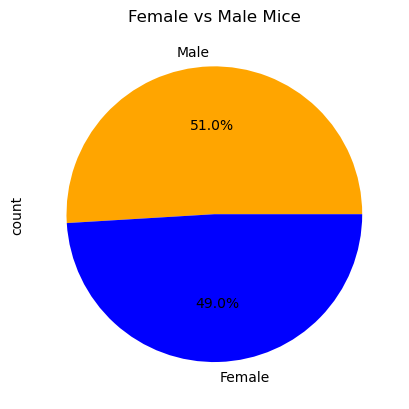

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by the 'Sex' column and calculate the count
gender_counts = clean_df['Sex'].value_counts()

# Plot the pie chart using pandas
gender_counts.plot.pie(autopct='%1.1f%%', startangle=0, colors=['orange', 'blue'])

# Add a title
plt.title('Female vs Male Mice')

# Show the plot
plt.show()

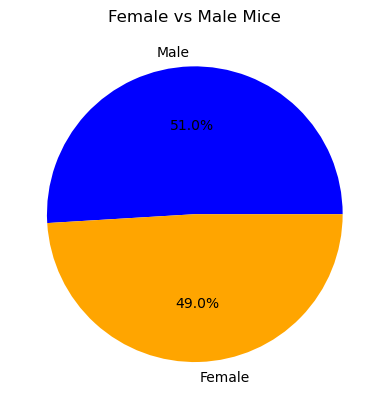

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Define the labels and sizes for the pie chart
labels = gender_counts.index
sizes = gender_counts.values

# Define the colors for the pie chart
colors = ['blue', 'orange']

# Plot pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)

# Add title
plt.title('Female vs Male Mice')

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Add 4 regimens to a list
specified_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# filter clean_df to those 4 regimens
filtered_df = clean_df[clean_df['Drug Regimen'].isin(specified_regimens)]

# get max timepoint for each mouse/regimen
max_timepoints_df = filtered_df.groupby(['Mouse ID'])['Timepoint'].max()

# merge df's into analysis_df
analysis_df = clean_df.merge(max_timepoints_df, on=["Mouse ID", "Timepoint"])

analysis_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [124]:
# Put treatments into a list for for loop (and later for plot labels)

specified_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# For each promising drug

for regimen in specified_regimens:

    #reset list each iteration through the loop
    tumor_vol_data = []
    
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series.
    reg_filter_df = analysis_df[analysis_df["Drug Regimen"] == regimen]

    # add the tumor volume series to the plotting list, 
    tumor_vol_data.extend(reg_filter_df["Tumor Volume (mm3)"].tolist())
    #print(tumor_vol_data)

    # Convert the tumor_vol_data list to a pandas Series
    tumor_vol_series = pd.Series(tumor_vol_data)
        
    # Determine outliers for this drug using IQR, upper and lower bounds
    # Q1
    q1 = tumor_vol_series.quantile(0.25)
    # Q3
    q3 = tumor_vol_series.quantile(0.75)

    # IQR
    iqr = q3 - q1

    # Calculate the upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Outliers
    outliers = tumor_vol_series.loc[(tumor_vol_series < lower_bound) | (tumor_vol_series > upper_bound)]
    
    # Print the outliers for the current drug regimen
    print(f"Outliers for {regimen}: {outliers.tolist()}")


Capomulin
Outliers for Capomulin: []
Ramicane
Outliers for Ramicane: []
Infubinol
Outliers for Infubinol: [36.3213458]
Ceftamin
Outliers for Ceftamin: []


In [98]:
min(tumor_vol_series)

22.05012627

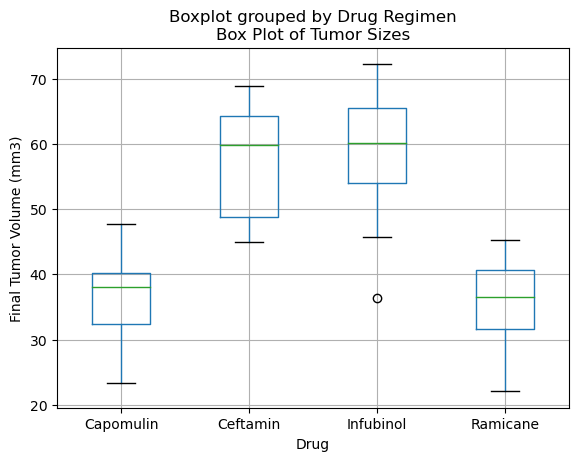

In [139]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

analysis_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')

#plt.xticks(box_data)

plt.xlabel("Drug")
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Box Plot of Tumor Sizes')

# Show box plot
plt.show()

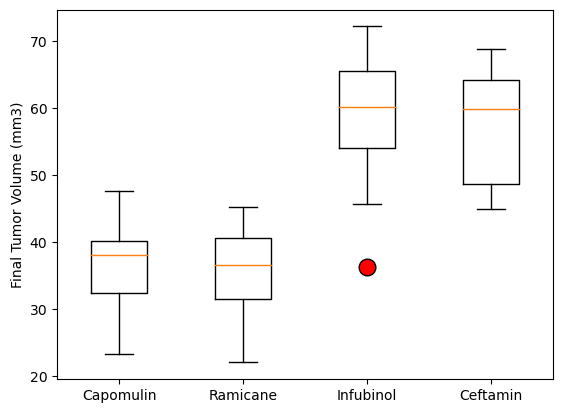

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

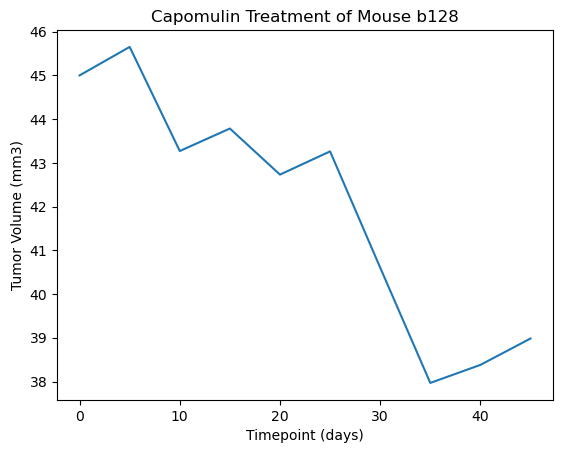

In [129]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# capomulin
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# grab mouse id
mouse_id = capomulin_df['Mouse ID'].iloc[0]

# filter 
single_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# plot
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')

# Display the plot
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

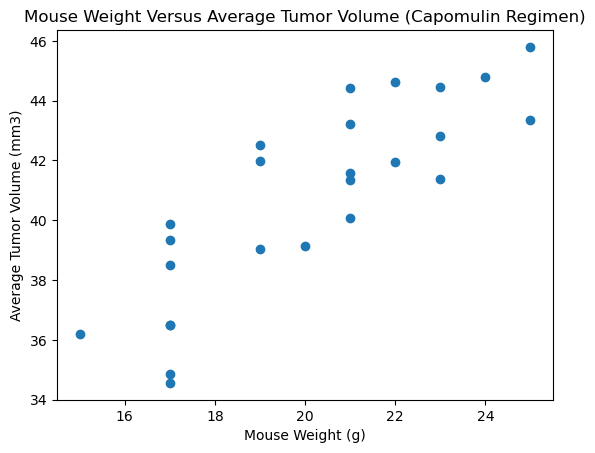

In [132]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean(numeric_only=True)

# scatter plot
fig1, ax1 = plt.subplots()
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.title("Mouse Weight Versus Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")



## Correlation and Regression

Correlation Coefficient: 0.8419363424694721
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723


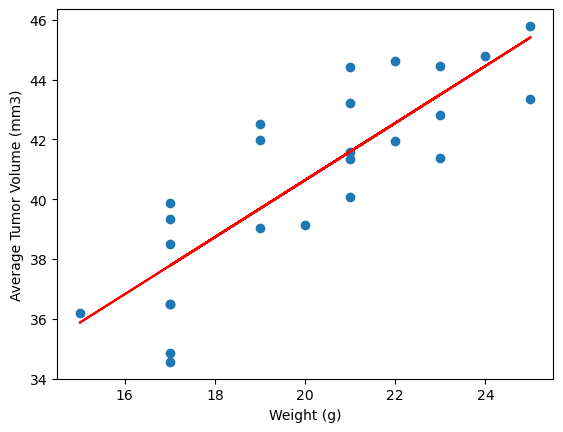

In [138]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# x and y axis
x = capomulin_average['Weight (g)']
y = capomulin_average['Tumor Volume (mm3)']


# calculate correlation coefficient
correlation_coefficient, p_value = st.pearsonr(x, y)
print("Correlation Coefficient:", correlation_coefficient)

# create linear regression model
(slope, intercept, r_value, p_value, std_err) = st.linregress(x, y)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

# line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = (x * slope) + intercept

# plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=12,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


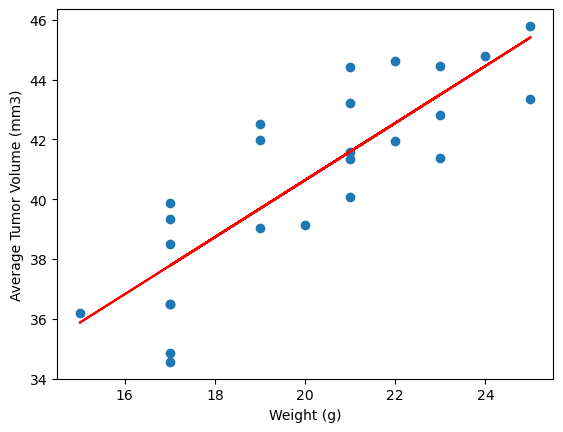

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
